<a href="https://www.kaggle.com/code/gouravlohar/data-cleaning?scriptVersionId=165848493" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv


In [2]:
df=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')

/tmp/ipykernel_18/2024958503.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')


In [3]:
df.sample(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
86258,48641629,Lux Furnished 2BR steps from Central Park!,92685233689,unconfirmed,Kara,Manhattan,Hell's Kitchen,40.76564,-73.98367,United States,...,$216,30.0,1.0,7/16/2016,0.03,2.0,121.0,110.0,Please remember that this is a residential bui...,NaN
76865,43453876,Inviting One Bedroom Apt in Prospect Heights,83545448362,unconfirmed,Catherine,Brooklyn,Prospect Heights,40.67821,-73.96588,United States,...,$42,30.0,6.0,1/31/2019,0.23,2.0,3.0,55.0,No Smoking,NaN
20255,12188173,Beautifull Bed Stuy 1bdrm apt with outdoor space!,16573520584,unconfirmed,Kv,Brooklyn,Bedford-Stuyvesant,40.69097,-73.93612,United States,...,$205,2.0,51.0,7/7/2019,3.10,3.0,1.0,5.0,"No shoes in the apartment, please",NaN
98515,55411171,Confortable apt in the Bronx NYC.,9516339388,unconfirmed,Desmar,Bronx,Concourse,40.82145,-73.92856,United States,...,$147,2.0,24.0,6/26/2019,2.76,2.0,2.0,288.0,NaN,NaN
89350,50349341,Comfortable room in a chic and modern house,65608172006,unconfirmed,Mei,Brooklyn,Carroll Gardens,40.67855,-74.00075,United States,...,$62,2.0,74.0,7/1/2019,2.24,4.0,2.0,45.0,"No smoking. If using the kitchen, guests must ...",NaN


In [4]:
df.shape

(102599, 26)

In [5]:
df.isnull()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
102595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
102596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,True
102597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [6]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
#df.shape[0] is for all rows
##df.shape[1] is for all columns

In [8]:
#to get percentage 
(df.isnull().sum()/df.shape[0])*100

id                                 0.000000
NAME                               0.243667
host id                            0.000000
host_identity_verified             0.281679
host name                          0.395715
neighbourhood group                0.028265
neighbourhood                      0.015595
lat                                0.007797
long                               0.007797
country                            0.518524
country code                       0.127682
instant_bookable                   0.102340
cancellation_policy                0.074075
room type                          0.000000
Construction year                  0.208579
price                              0.240743
service fee                        0.266084
minimum nights                     0.398639
number of reviews                  0.178364
last review                       15.490404
reviews per month                 15.476759
review rate number                 0.317742
calculated host listings count  

In [9]:
#as we can see license having 99% null values
#so we will drop that column

In [10]:
#to get all null values
df.isnull().sum().sum()

190769

In [11]:
#percentage of total
((df.isnull().sum().sum())/(df.shape[0]*df.shape[1]))*100

7.1514042347091396

In [12]:
#how to check not null value
df.notnull().sum()

id                                102599
NAME                              102349
host id                           102599
host_identity_verified            102310
host name                         102193
neighbourhood group               102570
neighbourhood                     102583
lat                               102591
long                              102591
country                           102067
country code                      102468
instant_bookable                  102494
cancellation_policy               102523
room type                         102599
Construction year                 102385
price                             102352
service fee                       102326
minimum nights                    102190
number of reviews                 102416
last review                        86706
reviews per month                  86720
review rate number                102273
calculated host listings count    102280
availability 365                  102151
house_rules     

The mask is generated by applying the notnull() method to the specified column of the DataFrame df, which evaluates each element in the column and returns True if the element is not null, and False otherwise.<br>
This operation selects only the rows where the corresponding element in the mask is True, effectively filtering out the rows where the specified column has null values.<br>
The filtered rows are stored in a new DataFrame called rows_with_not_null.

In [13]:
#as we can see license column have 2 not null values to check which are not null
mask=df['license'].notnull()
not_null_rows=df[mask]
not_null_rows

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
11114,7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,191.0,"Dear Guest, Thank you for appreciating that I ...",41662/AL
72947,41289964,"Cozy 1 BR on Bedford Avenue, Wburg",25804773951,unconfirmed,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,0.0,NaN,41662/AL


In [14]:
#generate heatmap
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
'''
sns.heatmap(df.isnull().sum())
plt.show()
'''
#this code will not work beacuse we want seperate seperate heatmap not 

'\nsns.heatmap(df.isnull().sum())\nplt.show()\n'

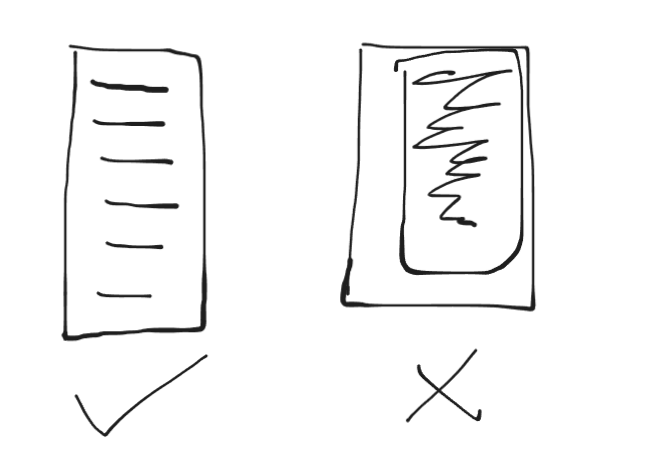

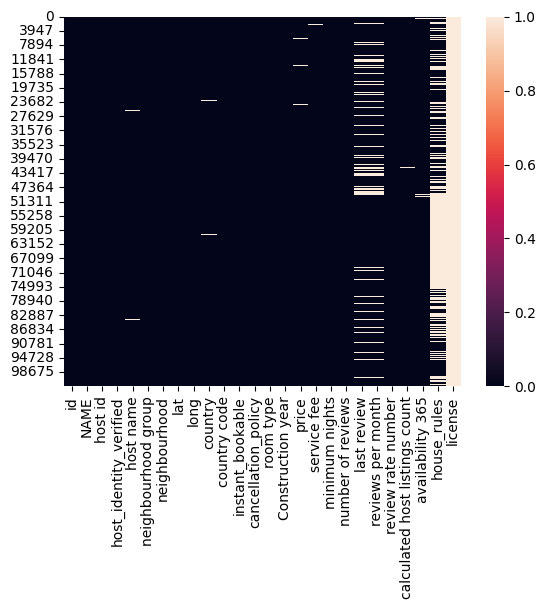

In [16]:
sns.heatmap(df.isnull())
plt.show()

In [17]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [18]:
df.shape

(102599, 26)

In [19]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

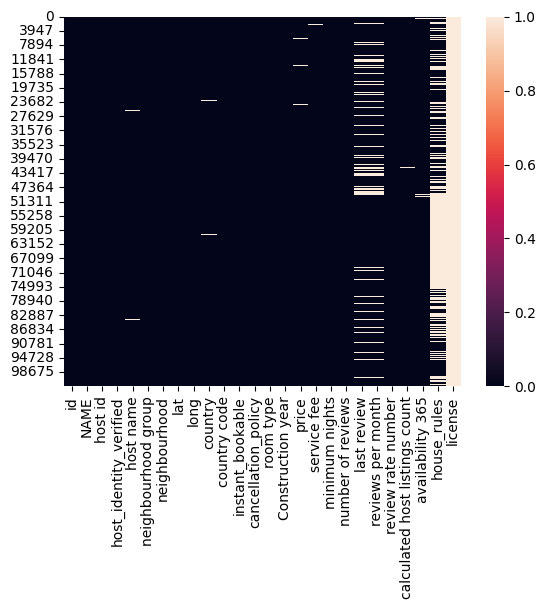

In [20]:
sns.heatmap(df.isnull())
plt.show()

In [21]:
df.drop(columns=['house_rules'],inplace=True)

In [22]:
df.sample(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,license
6138,4391353,"Great location, spacious apt.",47662984592,verified,Santiago,Brooklyn,Boerum Hill,40.68348,-73.98087,United States,...,$857,$171,3.0,3.0,1/5/2016,0.05,4.0,1.0,281.0,NaN
63465,36053056,"Top Floor 1Br penthouse with large Patio ,Ac ,...",59718680815,verified,Erik,Brooklyn,Bedford-Stuyvesant,40.68494,-73.92947,United States,...,$304,$61,30.0,1.0,10/3/2021,0.19,5.0,1.0,102.0,NaN
96306,54191140,"Central Harlem, New York City",19857607546,verified,Lamar,Manhattan,Harlem,40.81857,-73.94020,United States,...,$773,$155,2.0,18.0,6/1/2019,1.45,5.0,1.0,0.0,NaN
22769,13576655,Great Apartment in the Heart of East Williamsburg,30825277756,verified,Alexander,Brooklyn,Williamsburg,40.71188,-73.94387,United States,...,"$1,134",$227,5.0,9.0,12/4/2018,0.34,1.0,1.0,20.0,NaN
57727,32883958,Spacious Private 2BR Apartment in Brooklyn!,37679443430,unconfirmed,Nicole,Brooklyn,Bensonhurst,40.60909,-73.99751,United States,...,"$1,093",$219,3.0,34.0,1/8/2022,1.14,3.0,1.0,170.0,NaN
39607,22876282,"Cozy Retreat, Close to LGA and Midtown",63027971529,unconfirmed,Kristine,Queens,East Elmhurst,40.75647,-73.89964,United States,...,"$1,154",$231,2.0,0.0,NaN,NaN,4.0,1.0,363.0,NaN
95522,53758137,SoHo Bedroom Central and Close to Many Subways,55231458505,unconfirmed,Robert,Manhattan,SoHo,40.72092,-74.00018,United States,...,$78,$16,1.0,75.0,6/29/2019,5.80,3.0,1.0,11.0,NaN
41396,23864347,Sunny and Charming Studio - Beautiful West Vil...,66029256769,unconfirmed,Heather,Manhattan,West Village,40.73847,-74.00620,United States,...,$945,$189,2.0,7.0,7/1/2019,2.92,2.0,1.0,3.0,NaN
100908,56732824,"Spacious LIC apartment, 10 min to Grand Central",17680790213,verified,John,Queens,Long Island City,40.74902,-73.94720,United States,...,$440,$88,5.0,0.0,NaN,NaN,1.0,1.0,0.0,NaN
56843,32395725,"Sleeper Sofa in Large, Stylish Living Room",98200021082,verified,Shane & Shreshth,Queens,Kew Gardens,40.70507,-73.83219,United States,...,$685,$137,3.0,26.0,1/20/2022,2.02,4.0,1.0,64.0,NaN


In [23]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
license         

<Axes: ylabel='count'>

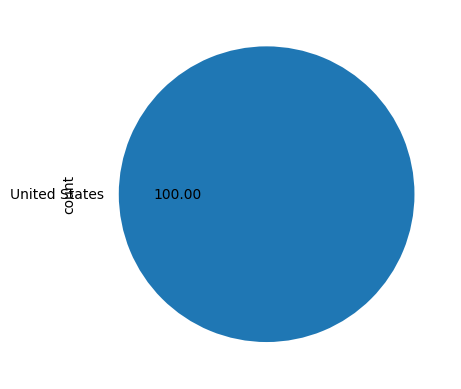

In [24]:
df['country'].value_counts().plot(kind='pie',autopct='%.2f')

In [25]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
license         

In [26]:
df.drop(columns=['license','last review','reviews per month'],inplace=True)

In [27]:
df.isnull().sum()

id                                  0
NAME                              250
host id                             0
host_identity_verified            289
host name                         406
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
country                           532
country code                      131
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                 214
price                             247
service fee                       273
minimum nights                    409
number of reviews                 183
review rate number                326
calculated host listings count    319
availability 365                  448
dtype: int64

In [28]:
df.sample(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
46133,26480592,Cozy Studio apartment,17941272275,unconfirmed,Hank,Brooklyn,Flatlands,40.62610,-73.94578,United States,...,strict,Entire home/apt,2019.0,"$1,052",$210,1.0,8.0,3.0,1.0,149.0
19902,11993211,"Privacy, comfort, style in the heart of Park S...",83577553259,unconfirmed,Helen And Alfred,Brooklyn,Park Slope,40.67192,-73.97733,United States,...,flexible,Entire home/apt,2010.0,$657,$131,3.0,104.0,3.0,1.0,262.0
73358,41516959,Private room with Visit queens #5,69447046521,unconfirmed,Sonia,Queens,Glendale,40.69987,-73.88952,United States,...,strict,Private room,2007.0,$382,$76,2.0,57.0,3.0,6.0,254.0
101563,57094581,"East Village, Private room with access to garden",18329244469,verified,Adi And Evangel,Manhattan,East Village,40.72584,-73.98940,United States,...,strict,Private room,2013.0,$474,$95,1.0,38.0,3.0,2.0,138.0
61081,34736372,Sun-Drenched Room w/PRIVATE BALCONY (Williamsb...,6721606134,verified,Michael,Brooklyn,Williamsburg,40.71094,-73.96227,United States,...,strict,Private room,2011.0,$855,$171,2.0,4.0,4.0,2.0,364.0


In [29]:
df.drop(columns=['host name','host id','host_identity_verified'],inplace=True)

In [30]:
df.sample(9)

,id,NAME,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
26695,15744985,EAST 60TH STREET STUDIO WITH 2 DOUBLE BEDS,Manhattan,Upper East Side,40.76114,-73.96100,United States,US,False,strict,Entire home/apt,2019.0,$329,$66,30.0,1.0,3.0,33.0,365.0
64853,36819648,XL BRAND NEW Modern 1BR ~W&D~ Walk to Central ...,Manhattan,Upper East Side,40.77334,-73.95482,United States,US,True,flexible,Entire home/apt,2016.0,$851,$170,30.0,2.0,5.0,59.0,162.0
67776,38434021,775 sq ft - Cozy 1 Bedroom with updated applia...,Manhattan,Upper East Side,40.77951,-73.94831,United States,US,True,moderate,Entire home/apt,2018.0,$618,$124,30.0,1.0,2.0,1.0,0.0
31281,18277832,Superb Private Bedroom with Private Bath in UPS!,Manhattan,Upper East Side,40.77768,-73.94951,United States,US,False,strict,Private room,2019.0,$136,$27,2.0,39.0,2.0,1.0,55.0
14540,9031778,"NEW! Furnished, East Village Gem",Manhattan,East Village,40.72526,-73.99031,United States,US,False,strict,Private room,2014.0,$877,$175,2.0,14.0,1.0,1.0,55.0
89416,50385793,1br wburg w/ views of NYC + doorman,Brooklyn,Williamsburg,40.71822,-73.95134,United States,US,False,moderate,Entire home/apt,2004.0,$140,$28,30.0,6.0,1.0,1.0,164.0
18199,11052644,"Cozy, cool, spacious Midtown!",Manhattan,Murray Hill,40.74796,-73.97949,United States,US,True,flexible,Shared room,2013.0,"$1,069",$214,1.0,3.0,3.0,1.0,0.0
98410,55353179,New! 3B2B Bayside/3 blocks to train/25 min to NYC,Queens,Bayside,40.76039,-73.77419,United States,US,False,strict,Entire home/apt,2011.0,$759,$152,3.0,1.0,4.0,1.0,0.0
67673,38377134,"Best Location, 2bdr Park Slope, Bk",Brooklyn,Park Slope,40.68070,-73.97769,United States,US,True,flexible,Entire home/apt,2010.0,"$1,004",$201,30.0,125.0,4.0,2.0,0.0


In [31]:
df.isnull().sum()

id                                  0
NAME                              250
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
country                           532
country code                      131
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                 214
price                             247
service fee                       273
minimum nights                    409
number of reviews                 183
review rate number                326
calculated host listings count    319
availability 365                  448
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   neighbourhood group             102570 non-null  object 
 3   neighbourhood                   102583 non-null  object 
 4   lat                             102591 non-null  float64
 5   long                            102591 non-null  float64
 6   country                         102067 non-null  object 
 7   country code                    102468 non-null  object 
 8   instant_bookable                102494 non-null  object 
 9   cancellation_policy             102523 non-null  object 
 10  room type                       102599 non-null  object 
 11  Construction year               102385 non-null  float64
 12  price           

In [33]:
df.select_dtypes(include='object').isnull().sum()

NAME                   250
neighbourhood group     29
neighbourhood           16
country                532
country code           131
instant_bookable       105
cancellation_policy     76
room type                0
price                  247
service fee            273
dtype: int64

In [34]:
df.select_dtypes(include='object').columns

Index(['NAME', 'neighbourhood group', 'neighbourhood', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'price', 'service fee'],
      dtype='object')

In [35]:
#to fill data in specified column
df['neighbourhood'].fillna(df['neighbourhood'].mode()[0],inplace=True)

/tmp/ipykernel_18/1597689857.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['neighbourhood'].fillna(df['neighbourhood'].mode()[0],inplace=True)


In [36]:
# for all categorical columns
for i in df.select_dtypes(include='object').columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

/tmp/ipykernel_18/2413686302.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)
/tmp/ipykernel_18/2413686302.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i].fillna(df[i].mode()[0],inplace=True)


In [37]:
df.select_dtypes(include='object').isnull().sum()
#all categorical columns are filled with mode

NAME                   0
neighbourhood group    0
neighbourhood          0
country                0
country code           0
cancellation_policy    0
room type              0
price                  0
service fee            0
dtype: int64

In [38]:
df.select_dtypes(include='float64').isnull().sum()

lat                                 8
long                                8
Construction year                 214
minimum nights                    409
number of reviews                 183
review rate number                326
calculated host listings count    319
availability 365                  448
dtype: int64

In [39]:
df.select_dtypes(include="float64").columns

Index(['lat', 'long', 'Construction year', 'minimum nights',
       'number of reviews', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')

In [40]:
#to fill numerical columns
# we can use sklearn imputer to fill numerical columns
from sklearn.impute import SimpleImputer

In [41]:
si=SimpleImputer(strategy='mean')
array=si.fit_transform(df[['lat', 'long', 'Construction year', 'minimum nights',
       'number of reviews', 'review rate number',
       'calculated host listings count', 'availability 365']])

In [42]:
new_df=pd.DataFrame(array,columns=df.select_dtypes(include="float64").columns)

In [43]:
new_df

,lat,long,Construction year,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
0,40.64749,-73.97237,2020.0,10.0,9.0,4.0,6.0,286.0
1,40.75362,-73.98377,2007.0,30.0,45.0,4.0,2.0,228.0
2,40.80902,-73.94190,2005.0,3.0,0.0,5.0,1.0,352.0
3,40.68514,-73.95976,2005.0,30.0,270.0,4.0,1.0,322.0
4,40.79851,-73.94399,2009.0,10.0,9.0,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...
102594,40.70862,-73.94651,2003.0,1.0,0.0,3.0,1.0,227.0
102595,40.80460,-73.96545,2016.0,1.0,1.0,2.0,2.0,395.0
102596,40.67505,-73.98045,2009.0,3.0,0.0,5.0,1.0,342.0
102597,40.74989,-73.93777,2015.0,2.0,5.0,3.0,1.0,386.0
